#### Importando as bibliotecas úteis, tais como classificadores etc...

In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import pprint
import matplotlib.pyplot as plt

# ignore warnings
import warnings
warnings.filterwarnings('ignore')


#### Lendo o Dataset e mostrando as primeiras linhas

In [3]:
dataset = pd.read_csv("diagnosed_cbc_data_v4.csv")
dataset.head()

,WBC,LYMp,NEUTp,LYMn,NEUTn,RBC,HGB,HCT,MCV,MCH,MCHC,PLT,PDW,PCT,Diagnosis
0,10.0,43.2,50.1,4.3,5.0,2.77,7.3,24.2,87.7,26.3,30.1,189.0,12.5,0.17,Normocytic hypochromic anemia
1,10.0,42.4,52.3,4.2,5.3,2.84,7.3,25.0,88.2,25.7,20.2,180.0,12.5,0.16,Normocytic hypochromic anemia
2,7.2,30.7,60.7,2.2,4.4,3.97,9.0,30.5,77.0,22.6,29.5,148.0,14.3,0.14,Iron deficiency anemia
3,6.0,30.2,63.5,1.8,3.8,4.22,3.8,32.8,77.9,23.2,29.8,143.0,11.3,0.12,Iron deficiency anemia
4,4.2,39.1,53.7,1.6,2.3,3.93,0.4,316.0,80.6,23.9,29.7,236.0,12.8,0.22,Normocytic hypochromic anemia


#### Características do Dataset
- HGB: The amount of hemoglobin in the blood, crucial for oxygen transport.

- PlT: The number of platelets in the blood, involved in blood clotting.

- WBC: The count of white blood cells, vital for immune response.

- RBC: The count of red blood cells, responsible for oxygen transport.

- MCV (Mean Corpuscular Volume): Average volume of a single red blood cell.

- MCH (Mean Corpuscular Hemoglobin): Average amount of hemoglobin per red blood cell.

- MCHC (Mean Corpuscular Hemoglobin Concentration): Average concentration of hemoglobin in red blood cells.

- PDW: a measurement of the variability in platelet size distribution in the blood

- PCT: A procalcitonin test can help your health care provider diagnose if you have sepsis from a bacterial infection or if you have a high risk of developing sepsis

- LYMp: Percentage of lymphocytes

- NEUTp: Percentage of neutrophils

- LYMn: Absolute lymphocyte count

- NEUTn: Absolute neutrophil count

- Diagnosis: Anemia type based on the CBC parameters

#### Etapa de pré-processamento da Base de Dados

Visualizando a quantidade de dados e quantidade de colunas

In [4]:
dataset.shape

(1281, 15)

Verificando as classes e a quantidade de classes únicas

In [6]:
unique_targets = set(dataset['Diagnosis'])
print("Quantidade por classe -> ", dataset['Diagnosis'].value_counts())

Quantidade por classe ->  Diagnosis
Healthy                           336
Normocytic hypochromic anemia     279
Normocytic normochromic anemia    269
Iron deficiency anemia            189
Thrombocytopenia                   73
Other microcytic anemia            59
Leukemia                           47
Macrocytic anemia                  18
Leukemia with thrombocytopenia     11
Name: count, dtype: int64


Verificando se há valores nulos

In [23]:
dataset.isnull().sum()

WBC          0
LYMp         0
NEUTp        0
LYMn         0
NEUTn        0
RBC          0
HGB          0
HCT          0
MCV          0
MCH          0
MCHC         0
PLT          0
PDW          0
PCT          0
Diagnosis    0
dtype: int64

Verificando se alguma coluna possui valores negativos

In [73]:
for col in dataset.columns:
    try:
        if dataset[col].min() < 0:
            print(col)
    except:
        pass

HGB
MCV


Excluíndo linhas com valores negativos

In [74]:
dataset= dataset.drop(dataset[dataset['HGB'] < 0].index[0])
dataset = dataset.drop(dataset[dataset['MCV'] < 0].index[0])

Checkando duplicações e realizando exclusões, caso haja

In [25]:
print("Duplicações antes da exclusão: ", dataset.duplicated().sum())
dataset.drop_duplicates(inplace=True)
print("Duplicações após exclusão: ", dataset.duplicated().sum())

Duplicações antes da exclusão:  49
Duplicações após exclusão:  0


#### Separando as variáveis X e Y (target)

In [26]:
target = dataset['Diagnosis']
x = dataset.drop('Diagnosis', axis=1)

<h5>Dividindo o dataset em treino e teste. A coluna Diagnosis é o nosso Y variável alvo</h5>
<p>Para esta tarefa vamos utilizar o K Fold.
</p>

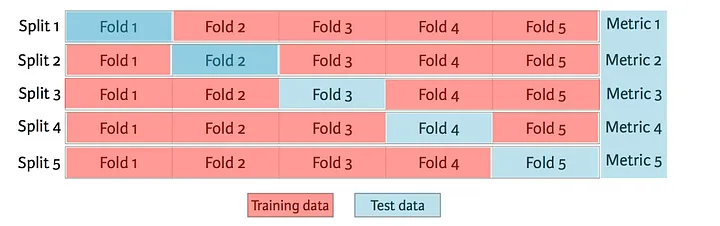

In [27]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

fold = 1
for train_index, test_index in kf.split(x, target):
    print(f'Fold:{fold}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    fold += 1

Fold:1, Train set: 984, Test set:246
Fold:2, Train set: 984, Test set:246
Fold:3, Train set: 984, Test set:246
Fold:4, Train set: 984, Test set:246
Fold:5, Train set: 984, Test set:246


#### Definindo os Classificadores a serem utilizados

In [75]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
svc_linear_classifier = SVC(kernel="linear", C=0.025, random_state=42)
decision_tree_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
random_forest_classifier =  RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, random_state=42)
mlp_classifier_classifier = MLPClassifier(alpha=1, max_iter=1000, random_state=42)

classifiers_names = ['KNN', 'SVC Linear', 'Decision Tree', 'Random Forest', 'MLP']

Acurácia: Proporção de previsões corretas em relação ao total de previsões.

Recall: Proporção de exemplos positivos que foram corretamente identificados pelo modelo.

Precisão: Proporção de exemplos classificados como positivos que foram corretamente identificados pelo modelo.

F1: Média entre precisão e recall, útil para conjuntos de dados desbalanceados (vimos que estamos com as classes desbalanceadas).

In [41]:
metrics = ['accuracy', 'f1_weighted', 'precision_weighted', 'recall_weighted']
classifiers = [knn_classifier, svc_linear_classifier, decision_tree_classifier, random_forest_classifier, mlp_classifier_classifier]
metric_results = []

for classifier, cl_name in zip(classifiers, classifiers_names):
    classifier_metrics = []
    for metric in metrics:
        score = cross_val_score(classifier, x, target, cv=kf, scoring=metric)
        classifier_metrics.append("%0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
        print(cl_name, "->", metric, " %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
    metric_results.append(classifier_metrics)
    print("\n")


KNN -> accuracy  0.67 (+/- 0.05)
KNN -> f1_weighted  0.66 (+/- 0.04)
KNN -> precision_weighted  0.67 (+/- 0.05)
KNN -> recall_weighted  0.67 (+/- 0.05)


SVC Linear -> accuracy  0.88 (+/- 0.02)
SVC Linear -> f1_weighted  0.87 (+/- 0.03)
SVC Linear -> precision_weighted  0.88 (+/- 0.03)
SVC Linear -> recall_weighted  0.88 (+/- 0.02)


Decision Tree -> accuracy  0.99 (+/- 0.02)
Decision Tree -> f1_weighted  0.99 (+/- 0.02)
Decision Tree -> precision_weighted  0.99 (+/- 0.02)
Decision Tree -> recall_weighted  0.99 (+/- 0.02)


Random Forest -> accuracy  0.85 (+/- 0.07)
Random Forest -> f1_weighted  0.82 (+/- 0.07)
Random Forest -> precision_weighted  0.82 (+/- 0.08)
Random Forest -> recall_weighted  0.85 (+/- 0.07)


MLP -> accuracy  0.71 (+/- 0.10)
MLP -> f1_weighted  0.70 (+/- 0.14)
MLP -> precision_weighted  0.71 (+/- 0.13)
MLP -> recall_weighted  0.71 (+/- 0.10)




#### Plotando tabela para comparar os resultados de acordo com classificadores e métricas 
Baseado em: https://www.scaler.com/topics/matplotlib/matplotlib-table/

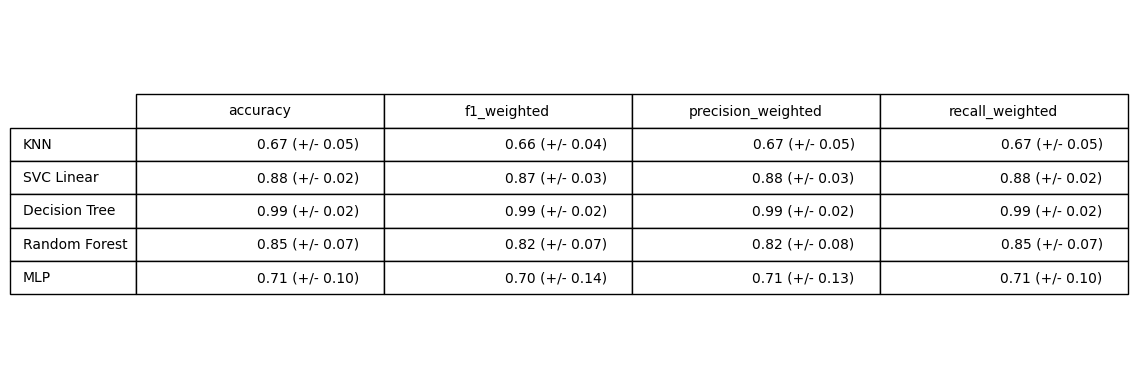

In [64]:
fig, ax =plt.subplots(1,1)
column_labels=metrics

df = pd.DataFrame(metric_results, columns=column_labels)

ax.axis('tight')
ax.axis('off')

table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=classifiers_names, loc="center")
table.set_fontsize(10)
table.scale(2,2)
plt.show()

#### Referências

- https://www.kaggle.com/datasets/ehababoelnaga/anemia-types-classification/data

- https://www.appsilon.com/post/machine-learning-evaluation-metrics-classification

- https://towardsdatascience.com/building-a-k-nearest-neighbors-k-nn-model-with-scikit-learn-51209555453a

- https://stackoverflow.com/questions/73893276/how-to-apply-the-result-of-k-fold-cross-validation-on-my-original-test-set

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold
